In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Bias–Variance Tradeoff

In this notebook we study the **Bias–Variance Tradeoff**, one of the fundamental concepts in machine learning.  
It describes the compromise between a model’s ability to fit the training data and its ability to generalize to unseen data.


## 1. Data generation

First, synthetic data are generated from a known function.  
Gaussian noise is added in order to simulate real-world observations.



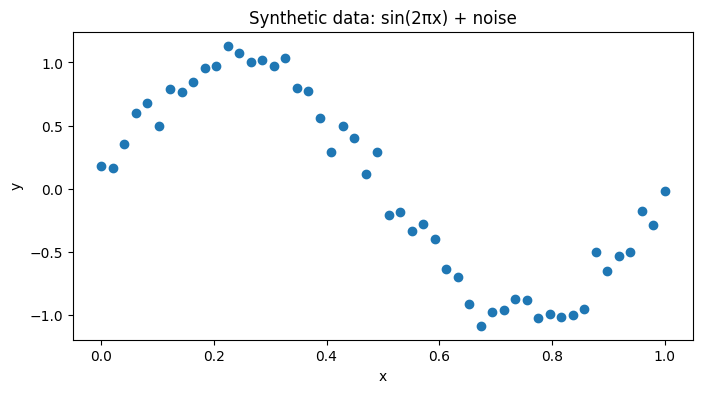

In [3]:
# Experiment parameters
np.random.seed(0)
n_samples = 50

# Independent variable
X = np.linspace(0, 1, n_samples).reshape(-1, 1)

# True function (unknown to the model) + noise
noise_std = 0.1
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, noise_std, size=n_samples)

# Visualization
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.title("Synthetic data: sin(2πx) + noise")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



## 2. Train/Test split

To study the generalization capability of the models, the dataset is divided into a training set (*train*) and a test set (*test*).  
The models are trained using the training data and evaluated on unseen test data.



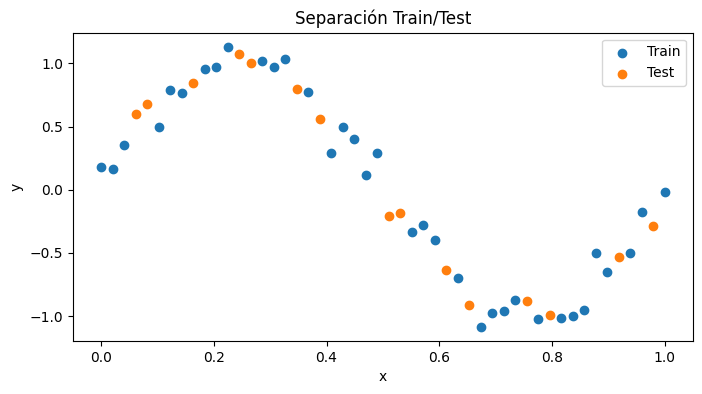

Train size: 35
Test size: 15


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.title("Separación Train/Test")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


## 3. Models with different complexity

Next, polynomial regression models with different degrees are trained.  
The degree of the polynomial controls the **model complexity**:

- Low degree → simple models (high bias)
- High degree → complex models (high variance)



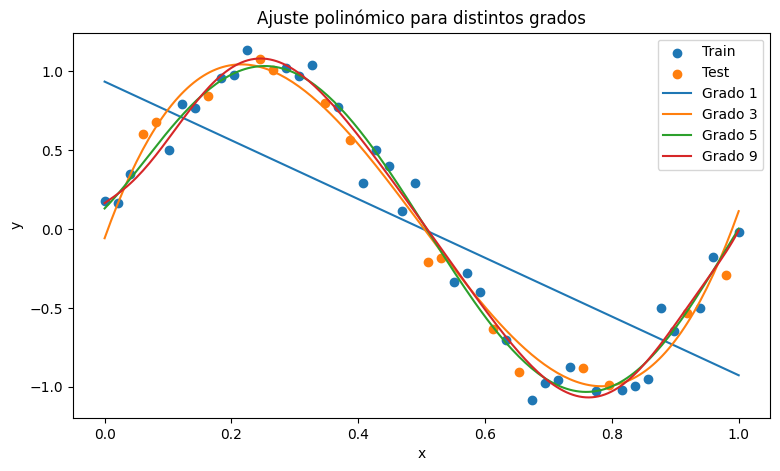

In [5]:
degrees = [1, 3, 5, 9]

X_plot = np.linspace(0, 1, 200).reshape(-1, 1)

plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_plot_poly = poly.transform(X_plot)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot, label=f"Grado {d}")

plt.title("Ajuste polinómico para distintos grados")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Degree  1 | Train MSE = 0.2253 | Test MSE = 0.1720
Degree  3 | Train MSE = 0.0177 | Test MSE = 0.0105
Degree  5 | Train MSE = 0.0112 | Test MSE = 0.0118
Degree  9 | Train MSE = 0.0104 | Test MSE = 0.0155


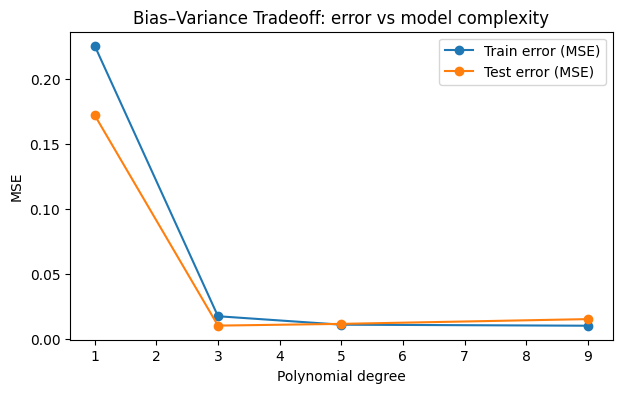

In [6]:
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Display quick table
for d, tr, te in zip(degrees, train_errors, test_errors):
    print(f"Degree {d:>2} | Train MSE = {tr:.4f} | Test MSE = {te:.4f}")

# Error plot
plt.figure(figsize=(7, 4))
plt.plot(degrees, train_errors, marker="o", label="Train error (MSE)")
plt.plot(degrees, test_errors, marker="o", label="Test error (MSE)")
plt.title("Bias–Variance Tradeoff: error vs model complexity")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()



From the previous figure, the **Bias–Variance Tradeoff** can be clearly observed.

- For **low polynomial degrees**, the model is too simple and fails to capture the nonlinear structure of the data, resulting in **high bias** (*underfitting*).
- For **high polynomial degrees**, the model fits the training data very well, but the test error increases due to **high variance** (*overfitting*).
- For an **intermediate degree**, the test error is minimized, indicating an optimal balance between bias and variance.

This behavior is characteristic of the tradeoff between model complexity and generalization performance.


## 4. Monte Carlo experiment: empirical estimation of bias and variance

So far, the behavior of the error has been analyzed using a single dataset.  
However, the **Bias–Variance Tradeoff** is defined by considering the variability of the model across different datasets.

To illustrate this, the experiment is repeated multiple times by generating new datasets with different noise realizations (*Monte Carlo simulation*), and the variability of the model predictions is analyzed.


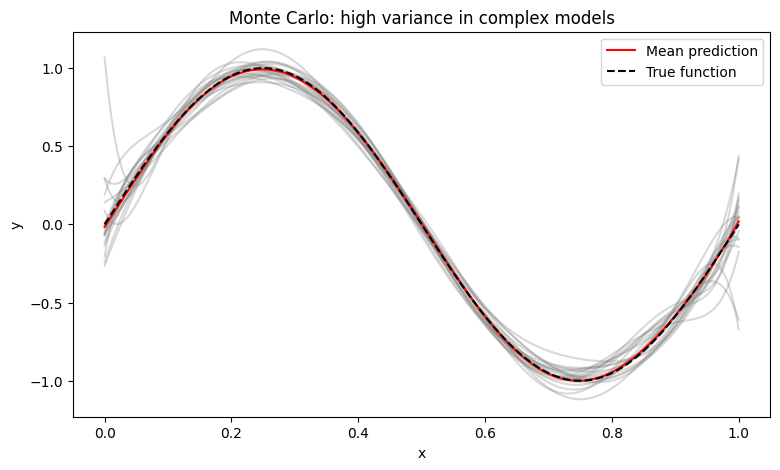

In [7]:
# Monte Carlo parameters
n_runs = 100
degree_mc = 9   # complex model to observe variance
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)

predictions = []

for i in range(n_runs):
    # Generate new dataset with different noise
    y_mc = np.sin(2 * np.pi * X).ravel() + np.random.normal(0, noise_std, size=n_samples)

    X_train_mc, _, y_train_mc, _ = train_test_split(
        X, y_mc, test_size=0.3
    )

    poly = PolynomialFeatures(degree=degree_mc)
    X_train_poly = poly.fit_transform(X_train_mc)
    X_plot_poly = poly.transform(X_plot)

    model = LinearRegression()
    model.fit(X_train_poly, y_train_mc)

    predictions.append(model.predict(X_plot_poly))

predictions = np.array(predictions)

# Mean prediction and variance
mean_prediction = predictions.mean(axis=0)
variance_prediction = predictions.var(axis=0)

# True function
y_true = np.sin(2 * np.pi * X_plot)

# Visualization
plt.figure(figsize=(9, 5))

for i in range(20):
    plt.plot(X_plot, predictions[i], color="gray", alpha=0.3)

plt.plot(X_plot, mean_prediction, color="red", label="Mean prediction")
plt.plot(X_plot, y_true, color="black", linestyle="--", label="True function")

plt.title("Monte Carlo: high variance in complex models")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()



In the previous figure, the characteristic behavior of a **high-complexity model** across different datasets can be observed.

- The gray curves represent the predictions obtained by training the model on different datasets.
- The large dispersion among these curves indicates **high variance**, meaning that small changes in the data lead to significantly different models.
- The average prediction (red curve) is close to the true underlying function, indicating **low bias**.

This experiment empirically illustrates how complex models tend to have low bias but high variance.


## 5. Conclusions

In this notebook, the **Bias–Variance Tradeoff** has been studied through controlled polynomial regression experiments.

The results show that:
- Simple models exhibit **high bias** and tend to underfit the data.
- Complex models exhibit **high variance** and tend to overfit the data.
- There exists an intermediate model complexity that minimizes the generalization error.

Additionally, a Monte Carlo experiment was used to empirically illustrate how model variance increases with complexity, confirming the theoretical definitions of the tradeoff.





---

**Author:** Javier Santabarbara  
**Course:** Deep Learning and Machine Learning  
**Degree:** Computer Engineering and Business Administration  
**University:** CUNEF  
**Year:** 2026

